In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv' , header = None , usecols = [0,1,2])
df.columns = ['Class labels' , 'Alcohol' , 'Malic Acid']
df.head()

,Class labels,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [6]:
np.unique(df['Class labels'])

array([1, 2, 3], dtype=int64)

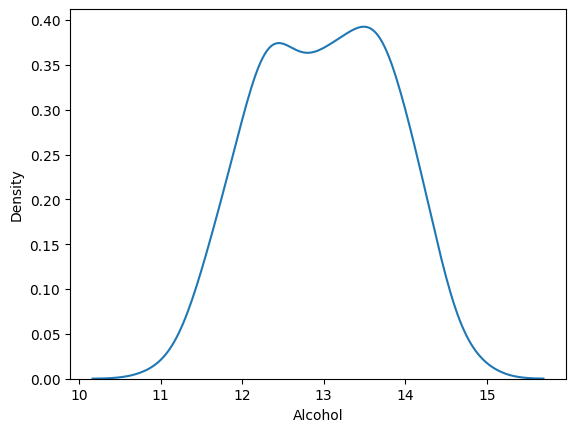

In [4]:
sns.kdeplot(df['Alcohol'])
plt.show()

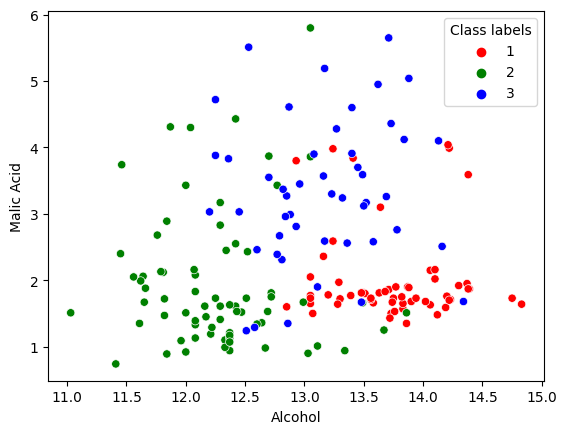

In [14]:
color_dict = {1:'red' , 2:'green' , 3:'blue'}
sns.scatterplot(x = df['Alcohol'] , y = df['Malic Acid'] , hue = df['Class labels'], palette = color_dict)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop('Class labels' , axis = 1) , df['Class labels'] , test_size = 0.33 , random_state = 0)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [23]:
np.round(X_train.describe() , 1)

,Alcohol,Malic Acid
count,119.0,119.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [27]:
np.round(X_train_scaled.describe() , 1) # LOOK the min and max value 

,Alcohol,Malic Acid
count,119.0,119.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


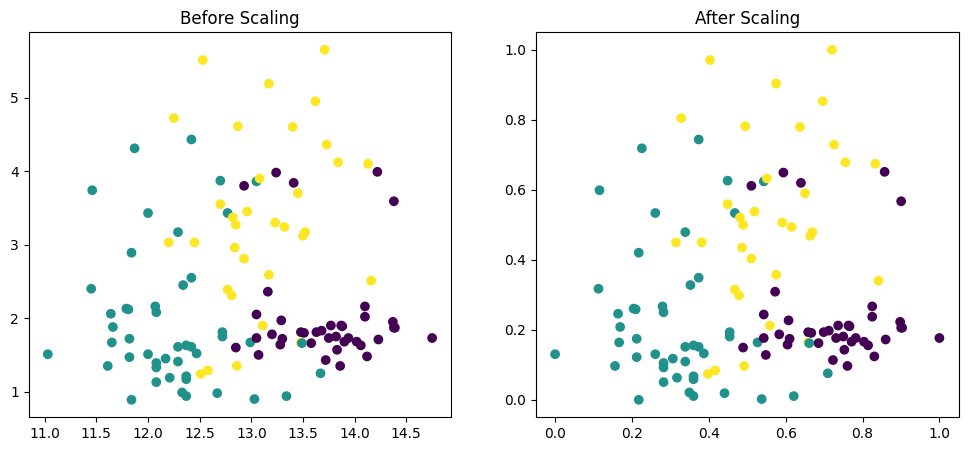

In [32]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

ax1.scatter(X_train['Alcohol'] , X_train['Malic Acid'] , c = y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'] , X_train_scaled['Malic Acid'] , c = y_train)
ax2.set_title('After Scaling')
plt.show()

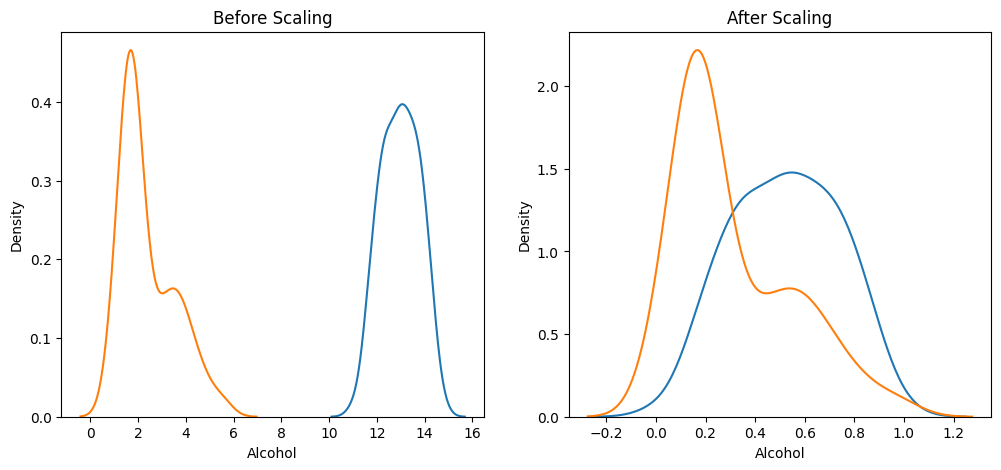

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

# NOTE After MinMaxScaling both graphs are come in same scale